<a href="https://colab.research.google.com/github/vaibhav54/MarketGad-Assignment/blob/main/MarketgadAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/archive.zip"

In [39]:
#importing libraries

import os
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [40]:
#importing dataset
#reading train images

classes = os.listdir('/content/tiny-imagenet-200/train/')
train_path = "/content/tiny-imagenet-200/tiny-imagenet-200/train/"

train_data, train_labels = [], []

for folder in tqdm(classes):
    for images in (os.listdir(train_path + folder + '/images')):
            # print(images)
            image = cv2.imread(train_path + folder + '/images/'+ images, 0)
                                                    #using grayscale images
            train_data.append(image)
            train_labels.append(folder)

100%|██████████| 200/200 [00:07<00:00, 27.57it/s]


In [41]:
# reading image names and labels from validation_annotation text file

val_data, val_labels = [], []

val_imagePath = "/content/tiny-imagenet-200/tiny-imagenet-200/val/images/"
file = open("/content/tiny-imagenet-200/tiny-imagenet-200/val/val_annotations.txt", "r")
content = file.read()
lines = content.split('\n')
lines = lines[:-1]

for i in tqdm(lines):
    sentence = i.split('\t')
    
    imgName = sentence[0]
    image = cv2.imread(val_imagePath + imgName,0)

    val_data.append(image)
    val_labels.append(sentence[1])


100%|██████████| 10000/10000 [00:00<00:00, 14268.75it/s]


In [42]:
len(train_data), len(val_data)

(100000, 10000)

In [43]:
#Feature Scaling
#normalizing images

for i, val in enumerate(train_data):
    train_data[i] = val/255

for i, val in enumerate(val_data):
    val_data[i] = val/255

In [44]:
#Feature Scaling
#label encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

encoder = LabelEncoder()

train_labels = encoder.fit_transform(train_labels)
val_labels = encoder.fit_transform(val_labels)

In [45]:
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [46]:
#converting into numpy array

train_data = np.array(train_data)
val_data = np.array(val_data)


train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

type(train_data), type(val_data)

(numpy.ndarray, numpy.ndarray)

In [47]:
#reshaping images data

train_data = np.reshape(train_data, (train_data.shape[0], 64, 64, 1))
val_data = np.reshape(val_data, (val_data.shape[0], 64, 64, 1))

In [48]:
print(train_data.shape, val_data.shape)
print(train_labels.shape, val_labels.shape)

(100000, 64, 64, 1) (10000, 64, 64, 1)
(100000, 200) (10000, 200)


In [49]:
#model building

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout


model = Sequential()

model.add(Conv2D(32, (3,3),padding="same", input_shape=(64,64,1) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512, (3,3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.30))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.30))
model.add(Dense(200, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)      

In [50]:
model.compile(optimizer='adam', loss="categorical_crossentropy", 
              metrics=['accuracy', 'top_k_categorical_accuracy'])

#value of k is 5 by default

In [51]:
#training model

history = model.fit(train_data, train_labels, epochs=30, verbose=1, batch_size=512, 
          validation_data=(val_data, val_labels), validation_batch_size=64)

Epoch 1/30
196/196 [==============================] - 16s 80ms/step - loss: 5.2512 - accuracy: 0.0082 - top_k_categorical_accuracy: 0.0373 - val_loss: 4.9948 - val_accuracy: 0.0264 - val_top_k_categorical_accuracy: 0.1041
Epoch 2/30
196/196 [==============================] - 16s 81ms/step - loss: 4.8021 - accuracy: 0.0409 - top_k_categorical_accuracy: 0.1411 - val_loss: 4.4411 - val_accuracy: 0.0819 - val_top_k_categorical_accuracy: 0.2367
Epoch 3/30
196/196 [==============================] - 16s 81ms/step - loss: 4.3368 - accuracy: 0.0879 - top_k_categorical_accuracy: 0.2583 - val_loss: 4.1485 - val_accuracy: 0.1217 - val_top_k_categorical_accuracy: 0.3169
Epoch 4/30
196/196 [==============================] - 16s 80ms/step - loss: 4.0209 - accuracy: 0.1312 - top_k_categorical_accuracy: 0.3408 - val_loss: 3.7855 - val_accuracy: 0.1699 - val_top_k_categorical_accuracy: 0.4009
Epoch 5/30
196/196 [==============================] - 15s 79ms/step - loss: 3.7924 - accuracy: 0.1640 - top_k_ca

In [52]:
predictedClasses = model.predict_classes(val_data)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [53]:
#Calculating top-5 error rate

incorrectClass = 0

for i in tqdm(range(len(val_data))):
    temp = val_data[i]
    temp = np.reshape(temp, (1,64,64,1))
    pred_val = model.predict(temp)
    top5classes = pred_val.argsort()[0][-5:]
    actualClass = np.argmax(val_labels[i])

    if actualClass not in top5classes:
        incorrectClass = incorrectClass + 1

    # print(top5classes, actualClass)
errorRate = incorrectClass / len(val_labels)*100
print("\nTop 5 error rate: ","{:.2f}".format(errorRate), "%")


100%|██████████| 10000/10000 [05:34<00:00, 29.90it/s]


Top 5 error rate:  45.10 %


In [54]:
#Evaluting Model

valTop5acc = history.history['val_top_k_categorical_accuracy'][-1] * 100
valAcc = history.history['val_accuracy'][-1] * 100

print("Top 5 validation accuracy: ","{:.2f}".format(valTop5acc), "%")
print("Validation accuracy: ","{:.2f}".format(valAcc), "%")

Top 5 validation accuracy:  54.90 %
Validation accuracy:  29.64 %


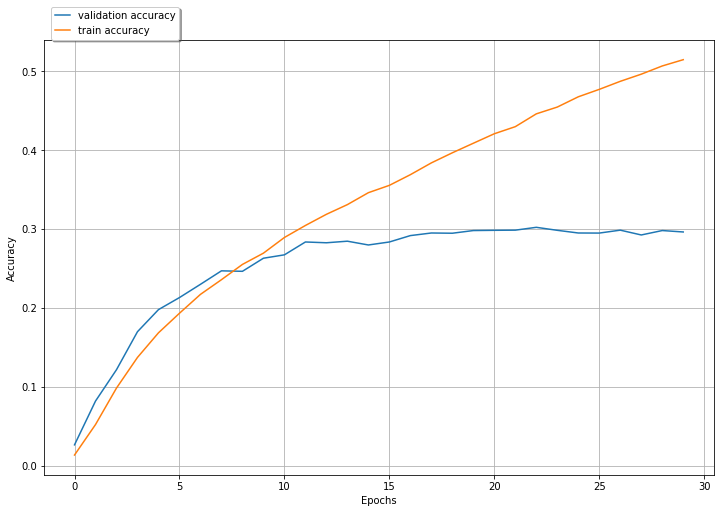

In [55]:
#Visualization

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(history.history['val_accuracy'],label='val')
plt.plot(history.history['accuracy'],label='train')

fig = plt.gcf()
fig.set_size_inches(12,8)
plt.grid(True)
plt.legend(('validation accuracy', 'train accuracy'),
           shadow=True, loc=(0.01, 1), handlelength=1.5, fontsize=10)
plt.show()

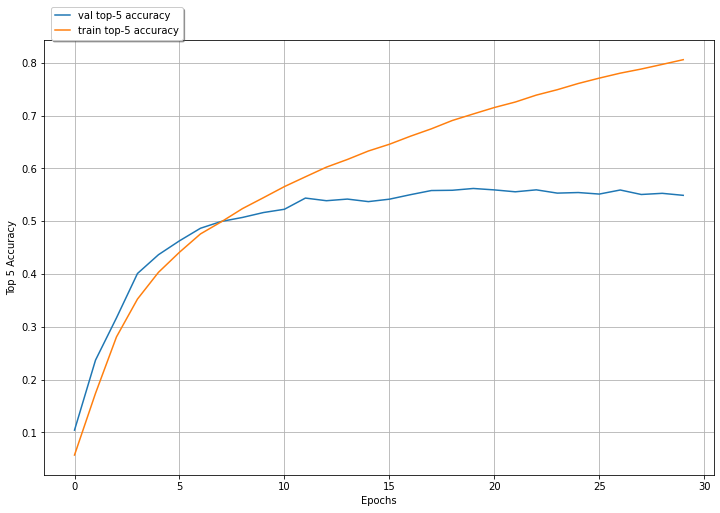

In [56]:
plt.xlabel('Epochs')
plt.ylabel('Top 5 Accuracy')

plt.plot(history.history['val_top_k_categorical_accuracy'],label='val')
plt.plot(history.history['top_k_categorical_accuracy'],label='train')

fig = plt.gcf()
fig.set_size_inches(12,8)
plt.grid(True)
plt.legend(('val top-5 accuracy', 'train top-5 accuracy'),
           shadow=True, loc=(0.01, 1), handlelength=1.5, fontsize=10)
plt.show()

In [57]:
val_label_encoded = []
for i in range(len(val_labels)):
    val_label_encoded.append(np.argmax(val_labels[i])) 

In [58]:
val_label_encoded = []
for i in range(len(val_labels)):
    val_label_encoded.append(np.argmax(val_labels[i])) 

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predictedClasses,val_label_encoded)
print(cm)

[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 1  1 14 ...  0  0  1]
 ...
 [ 0  0  0 ...  9  6  0]
 [ 0  0  0 ...  8 26  0]
 [ 2  0  1 ...  0  0  8]]


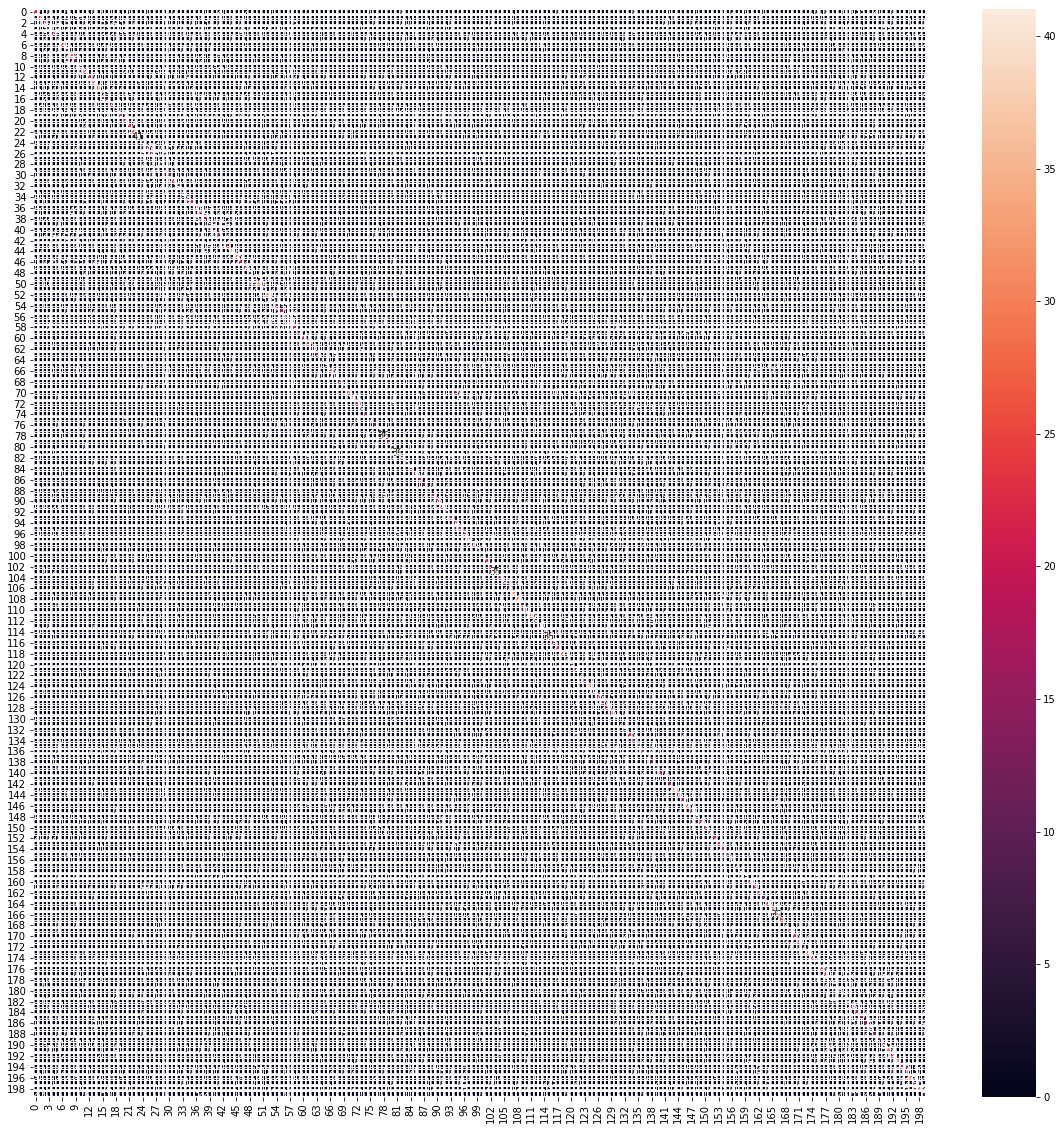

In [60]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

In [61]:
model.save('model.h5')

In [62]:
#loading saved model
from keras.models import load_model

loadedModel = load_model('/content/model.h5')
ev = loadedModel.evaluate(val_data, val_labels)

print("Loss: ", ev[0])
print("valdation accuracy: ", ev[1]*100, "%")
print("top 5 validation accuracy: ", ev[2]*100, "%" )

313/313 [==============================] - 2s 5ms/step - loss: 3.2902 - accuracy: 0.2964 - top_k_categorical_accuracy: 0.5490
Loss:  3.2901854515075684
valdation accuracy:  29.64000105857849 %
top 5 validation accuracy:  54.90000247955322 %
